In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
#load csv file with headers 
location = "Datasets/DC_Properties.csv"
df = pd.read_csv(location)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [9]:
# selecting required columns
df2=df[['ROOMS', 'PRICE', 'BATHRM']]
df2

,ROOMS,PRICE,BATHRM
0,8,1095000.0,4
1,11,NaN,3
2,9,2100000.0,3
3,8,1602000.0,3
4,11,NaN,2
5,10,1950000.0,3
6,5,NaN,1
7,8,1050000.0,3
8,7,1430000.0,3
9,6,NaN,1


In [13]:
#Selecting rows with no missing rooms or price
df2[df2['ROOMS'].notnull()& df2['PRICE'].notnull()]

,ROOMS,PRICE,BATHRM
0,8,1095000.0,4
2,9,2100000.0,3
3,8,1602000.0,3
5,10,1950000.0,3
7,8,1050000.0,3
8,7,1430000.0,3
14,5,1325000.0,3
16,8,1240000.0,3
19,9,592250.0,3
20,14,33232.0,3


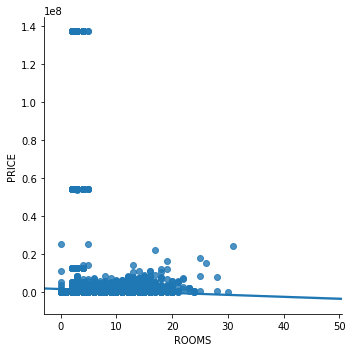

In [11]:
#make a scatterplot
sns.lmplot(x='ROOMS', y='PRICE', data=df2)

In [12]:
df2.corr()

,ROOMS,PRICE,BATHRM
ROOMS,1.000000,-0.038241,0.677751
PRICE,-0.038241,1.000000,-0.006536
BATHRM,0.677751,-0.006536,1.000000


In [17]:
# selecting required columns
df3=df[['ROOMS', 'PRICE', 'BATHRM','STORIES','KITCHENS']]
df3

,ROOMS,PRICE,BATHRM,STORIES,KITCHENS
0,8,1095000.0,4,3.0,2.0
1,11,NaN,3,3.0,2.0
2,9,2100000.0,3,3.0,2.0
3,8,1602000.0,3,3.0,2.0
4,11,NaN,2,3.0,1.0
5,10,1950000.0,3,4.0,1.0
6,5,NaN,1,2.0,2.0
7,8,1050000.0,3,3.0,2.0
8,7,1430000.0,3,2.0,2.0
9,6,NaN,1,2.0,1.0


In [18]:
df3.corr()

,ROOMS,PRICE,BATHRM,STORIES,KITCHENS
ROOMS,1.000000,-0.038241,0.677751,0.039352,0.525796
PRICE,-0.038241,1.000000,-0.006536,0.042337,0.045213
BATHRM,0.677751,-0.006536,1.000000,0.042349,0.423178
STORIES,0.039352,0.042337,0.042349,1.000000,0.021013
KITCHENS,0.525796,0.045213,0.423178,0.021013,1.000000


In [20]:
import statsmodels.formula.api as smf

In [21]:
result = smf.ols('ROOMS ~ PRICE + BATHRM + STORIES + KITCHENS', data=df3).fit()

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ROOMS   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.494e+04
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        15:31:26   Log-Likelihood:            -1.0992e+05
No. Observations:               57866   AIC:                         2.198e+05
Df Residuals:                   57861   BIC:                         2.199e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5537      0.018    201.567      0.000       3.519       3.588
PRICE        3.67e-07    1.3e-08     28.159      0.000    3.41e-07    3.93e-07
BATHRM         0.9929      0.008    122.200      0.000       0.977       1.009
STORIES        0.0028      0.002      1.638      0.101      -0.001       0.006
KITCHENS       1.1892      0.011    105.092      0.000       1.167       1.211
==============================================================================
Omnibus:                    12544.014   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           385076.969
Skew:                           0.358   Prob(JB):                         0.00
Kurtosis:                      15.617   Cond. No.                     2.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""